<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-and-inspect-data" data-toc-modified-id="Load-and-inspect-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load and inspect data</a></span></li><li><span><a href="#Define-target-columns" data-toc-modified-id="Define-target-columns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define target columns</a></span></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Baseline</a></span></li><li><span><a href="#Calculate-RMSE-for-the-constant-predictions." data-toc-modified-id="Calculate-RMSE-for-the-constant-predictions.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate RMSE for the constant predictions.</a></span></li><li><span><a href="#Error-histograms" data-toc-modified-id="Error-histograms-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Error histograms</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn")

#### Load and inspect data

In [2]:
df_test = pd.read_csv("data/sag_data_test.csv", index_col="Time", parse_dates=True)

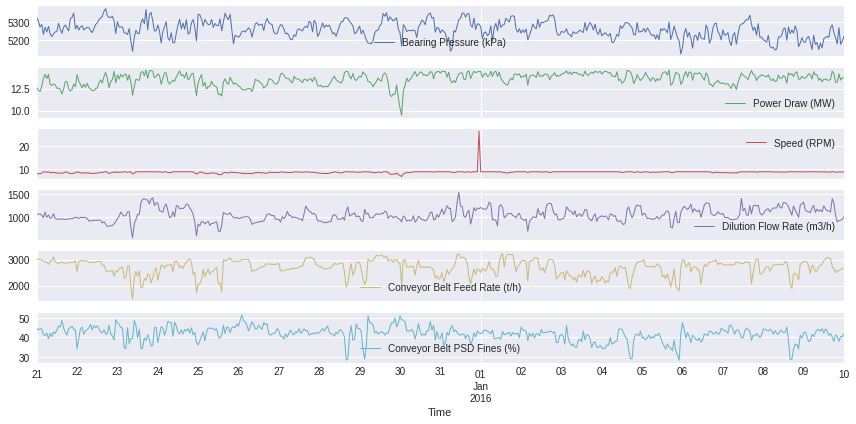

In [5]:
df_test.resample("h").median().plot(subplots=True, layout=(-1, 1), lw=1, figsize=(12, 6))
plt.tight_layout()

#### Define target columns

In [6]:
target_cols = ['Bearing Pressure (kPa)', 'Power Draw (MW)']

#### Baseline
As the baseline, we will use a "model" that simply predicts that the last value will remain constant over the next five minutes.

In [7]:
actual = df_test[target_cols].shift(5)
predicted = df_test[target_cols]
errors = predicted - actual

#### Calculate RMSE for the constant predictions.

In [8]:
rmse = (errors**2).mean()**0.5
rmse

Bearing Pressure (kPa)    44.384918
Power Draw (MW)            0.480964
dtype: float64

#### Error histograms

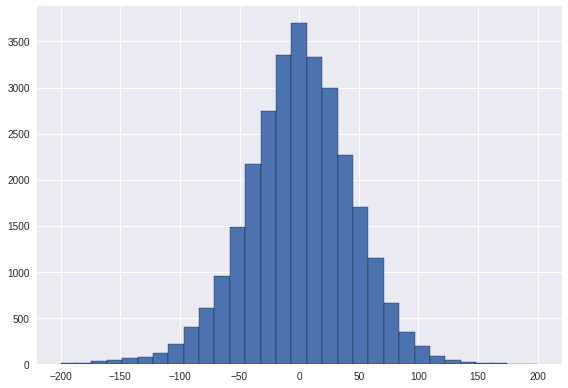

In [9]:
errors['Bearing Pressure (kPa)'].hist(bins=31, range=(-200, 200), edgecolor="k")
plt.tight_layout()

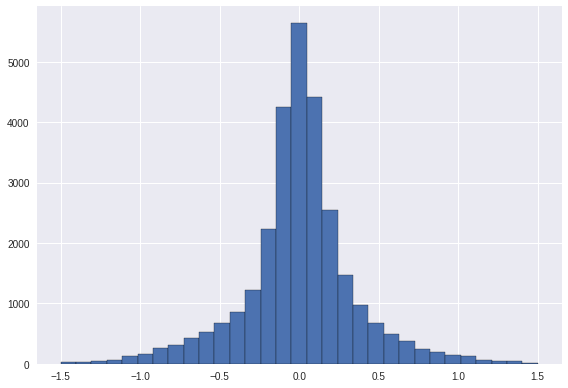

In [10]:
errors['Power Draw (MW)'].hist(bins=31, range=(-1.5, 1.5), edgecolor="k")
plt.tight_layout()